<a href="https://colab.research.google.com/github/aalr007/MAAM/blob/main/A3a_DL_TC3007B_embeddings_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> ***Métodos Avanzados de Aprendizaje Máquina*** </center>
## <center> ***Equipo 38*** </center>
## <center> ***Activity 3a*** </center>
### Profesor: Dr José Antonio Cantoral Cevallos
### Alumnos:
* Luis Alfredo Negron Naldos A01793865
* Javier Muñoz Barrios A01794423
* Aurelio Antonio Lozano Rábago A01081266

#### <p style='text-align: right;'> Noviembre del 2023 </p>

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [ ]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

#### Load file

In [ ]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
PATH = 'glove.6B/glove.6B.200d.txt'
emb_dim = 200

In [ ]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    # Crea un diccionario para almacenar las incrustaciones
    emb_dict = {}

    # abrimos la base de datos
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(' ')  # Supongamos que las incrustaciones están separadas por espacios.
            word = parts[0]  # La primera parte es la palabra o elemento.
            embedding = [float(val) for val in parts[1:]]  # El resto son los valores.
            emb_dict[word] = embedding

    # Guarda el diccionario en un archivo serializado para cargarlo rápidamente en el futuro.
    with open('embeddings_dict_200D.pkl', 'wb') as output_file:
        pickle.dump(emb_dict, output_file)

        # Retorna el diccionario creado
    return emb_dict

In [ ]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [ ]:
# Serialize
with open('embeddings_dict_200D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [ ]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [ ]:
show_n_first_words(PATH, 5)

['the', '-0.071549', '0.093459', '0.023738', '-0.090339', '0.056123', '0.32547', '-0.39796', '-0.092139', '0.061181', '-0.1895', '0.13061', '0.14349', '0.011479', '0.38158', '0.5403', '-0.14088', '0.24315', '0.23036', '-0.55339', '0.048154', '0.45662', '3.2338', '0.020199', '0.049019', '-0.014132', '0.076017', '-0.11527', '0.2006', '-0.077657', '0.24328', '0.16368', '-0.34118', '-0.06607', '0.10152', '0.038232', '-0.17668', '-0.88153', '-0.33895', '-0.035481', '-0.55095', '-0.016899', '-0.43982', '0.039004', '0.40447', '-0.2588', '0.64594', '0.26641', '0.28009', '-0.024625', '0.63302', '-0.317', '0.10271', '0.30886', '0.097792', '-0.38227', '0.086552', '0.047075', '0.23511', '-0.32127', '-0.28538', '0.1667', '-0.0049707', '-0.62714', '-0.24904', '0.29713', '0.14379', '-0.12325', '-0.058178', '-0.001029', '-0.082126', '0.36935', '-0.00058442', '0.34286', '0.28426', '-0.068599', '0.65747', '-0.029087', '0.16184', '0.073672', '-0.30343', '0.095733', '-0.5286', '-0.22898', '0.064079', '0.0

### Plot some embeddings

In [ ]:
#
def plot_embeddings(emb_path, words2show,emb_dim, embeddings_dict, func):
    # Cargar el diccionario de incrustaciones desde el archivo serializado
    with open(emb_path, 'rb') as input_file:
        embeddings_dict = pickle.load(input_file)

    # Obtener las palabras y las incrustaciones en una matriz NumPy
    embeddings_matrix = np.array([embeddings_dict[word] for word in words2show])

    if func == 'PCA':
        # Aplicar PCA para reducir las dimensiones
        pca = PCA(n_components=emb_dim)
        embeddings = pca.fit_transform(embeddings_matrix)
    elif func == 'TSNE':
        # Aplicar t-SNE para reducir las dimensiones
        tsne = TSNE(n_components=emb_dim)
        embeddings = tsne.fit_transform(embeddings_matrix)
    else:
        raise ValueError("Func debe ser 'PCA' o 'TSNE'")

    num_elements = len(words2show)

    plt.figure(figsize=(13, 10))
    sns.set()

    x = embeddings[:num_elements, 0]  # Usa solo los primeros 'num_elements'
    y = embeddings[:num_elements, 1]

    # Crea un scatter plot
    plt.scatter(x, y, alpha=0.5)

    # Etiqueta cada punto con la palabra correspondiente
    for i, word in enumerate(words2show):
        plt.annotate(word, (x[i], y[i]), alpha=0.7)

    plt.show()

In [ ]:

words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']

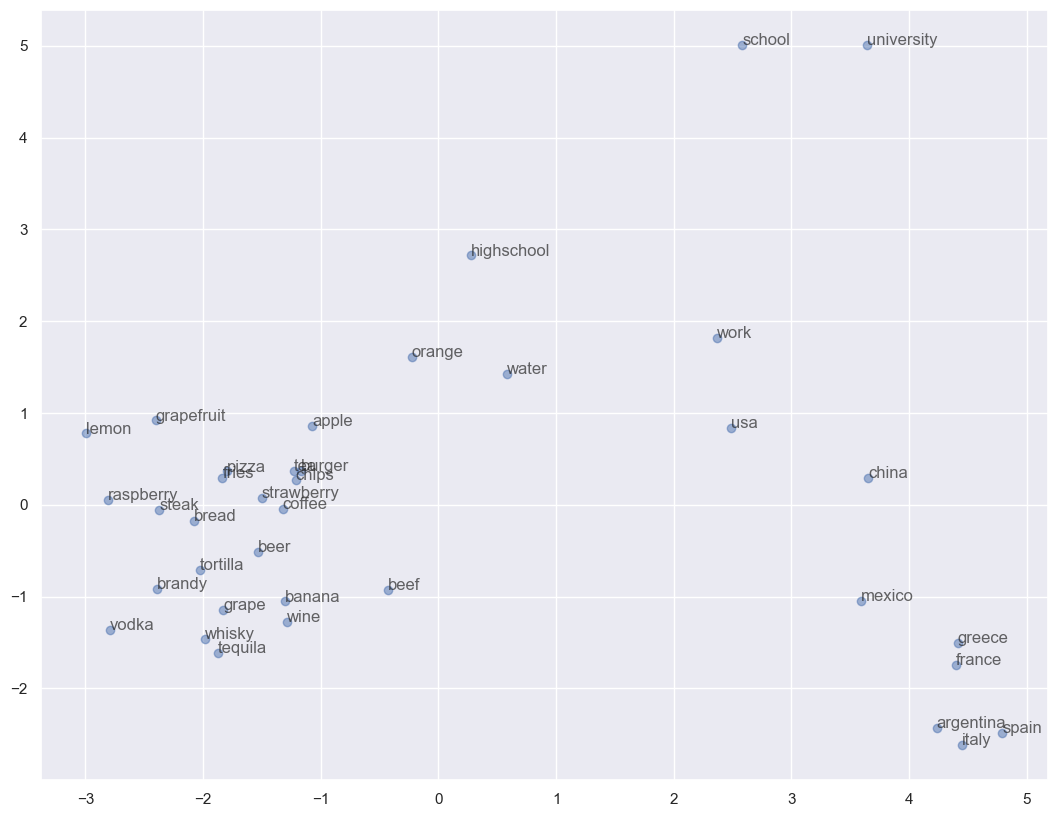

In [ ]:
#
plot_embeddings("embeddings_dict_200D.pkl", words, 2, embeddings_dict, "PCA")

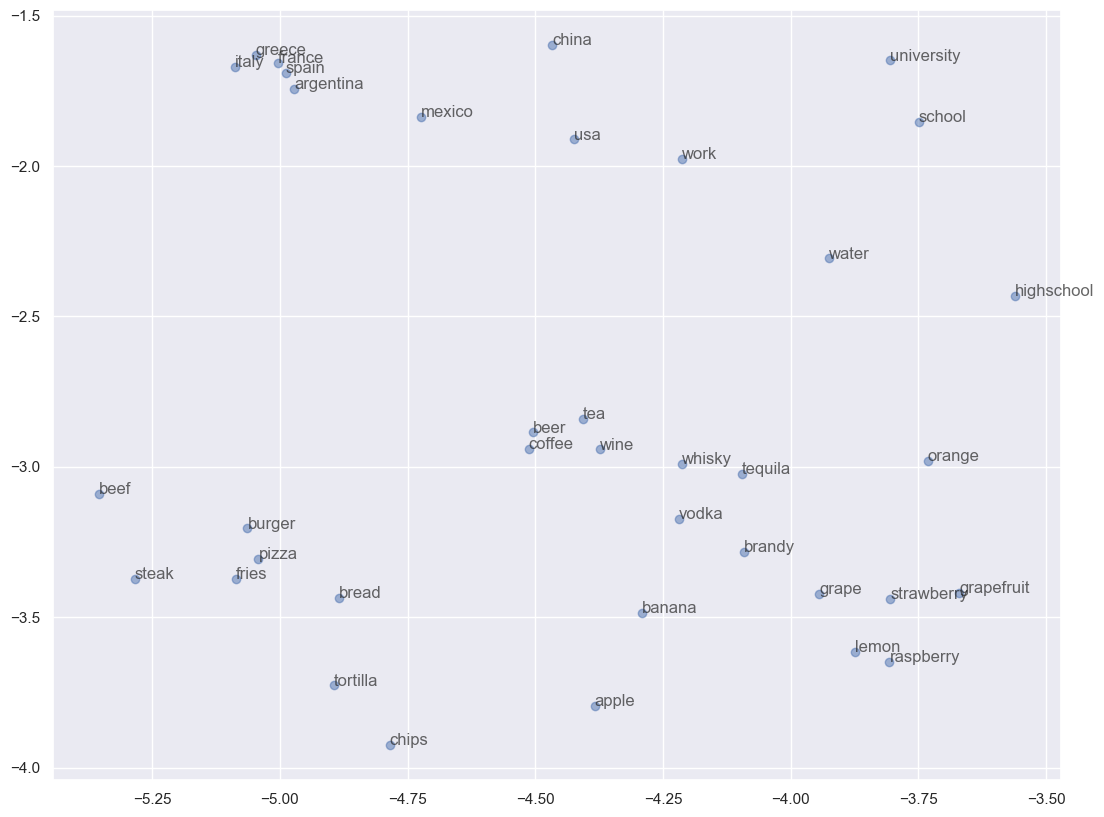

In [ ]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings("embeddings_dict_200D.pkl", words, 2, embeddings_dict, "TSNE")

### Let us compute analogies

In [ ]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
    word1, word2, word3 = word1.lower(), word2.lower(), word3.lower()

    # Obtén los vectores de incrustación para las palabras y conviértelos a vectores NumPy
    vec_a, vec_b, vec_c = np.array(embeddings_dict[word1]), np.array(embeddings_dict[word2]), np.array(embeddings_dict[word3])

    # Calcula el vector objetivo como: vec_b - vec_a + vec_c
    vec_target = vec_b - vec_a + vec_c

    # Encuentra la palabra más similar al vector objetivo
    min_dist = float("inf")
    best_word = None

    for word, vec in embeddings_dict.items():
        if word not in [word1, word2, word3]:
            dist = np.linalg.norm(vec - vec_target)
            if dist < min_dist:
                min_dist = dist
                best_word = word

    return best_word


In [ ]:
analogy('boy', 'son', 'girl', embeddings_dict)

'daughter'

In [ ]:
def find_most_similar(word, embeddings_dict, top_n=10):
    if word not in embeddings_dict:
        return []  # La palabra no está en el diccionario de incrustaciones

    # Obtén el vector de incrustación de la palabra de entrada
    word_vector = embeddings_dict[word]

    # Calcula la similitud coseno entre el vector de la palabra de entrada y todos los demás vectores
    similarities = {}
    for other_word, other_vector in embeddings_dict.items():
        if other_word != word:
            similarity = np.dot(word_vector, other_vector) / (np.linalg.norm(word_vector) * np.linalg.norm(other_vector))
            similarities[other_word] = similarity

    # Ordena las palabras por similitud coseno y toma las "top_n" más similares
    most_similar = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return most_similar

In [ ]:
most_similar = find_most_similar('book', embeddings_dict)

In [ ]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> books
2 ---> author
3 ---> novel
4 ---> published
5 ---> memoir
6 ---> wrote
7 ---> written
8 ---> essay
9 ---> biography
10 ---> autobiography
